In [1]:
import pandas as pd

In [2]:
base_dir = './data/'

data = pd.read_csv(base_dir + 'custom_train_2.csv')
data.head()

,idx,class,conversation,label
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가 ? 아닙니다 . 죄송합니다 . 죽을 거...,0
1,0,협박 대화,. 죄송합니다 . 정말 잘못했습니다 . 너에게는 선택권이 없어 . 선택 못한다면 너...,0
2,1,협박 대화,길동경찰서입니다 . 9시 40분 마트에 폭발물을 설치할거다 . 네 ? 똑바로 들어 ...,0
3,1,협박 대화,. 장난전화는 업무방해죄에 해당됩니다 . 판단은 너에게 달려있다 . 길동경찰서에도...,0
4,2,기타 괴롭힘 대화,너 되게 귀여운거 알지 ? 나보다 작은 남자는 첨봤어 . 그만해 . 니들 놀리는거 ...,3


In [3]:
# !pip install ko-ww-stopwords
# !pip install stopwordsiso

In [4]:
# # 불용어

# from ko_ww_stopwords.stop_words import ko_ww_stop_words
# from ko_ww_stopwords.tools import is_stop_word, strip_outer_punct

# ko_ww_stopwords = ko_ww_stop_words

# from stopwordsiso import stopwords

# stopwordsiso_stopwords = stopwords(["ko"])


# total_stopwords = ko_ww_stopwords | stopwordsiso_stopwords
# total_stopwords

In [5]:
# # 전처리 함수
# # 구분자 삭제
# import re

# def preprocess_sentence(sentence):
#     # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
#     # 예를 들어서 "I am a student." => "I am a student ."와 같이
#     # student와 온점 사이에 거리를 만듭니다.
#     sentence = sentence.replace("\n", "")         # 구분자
#     sentence = sentence.replace("\r", "")         # 구분자
# #     sentence = sentence.replace("안녕하세요", "")         # 안녕하세요
# #     sentence = sentence.replace("안녕", "")         # 안녕하세요
    
#     sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
#     sentence = re.sub(r'[" "]+', " ", sentence)
    

#     # (a-z, A-Z,가-힣,0-9, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
#     sentence = re.sub(r"[^a-zA-Z가-힣0-9\.\?\!,]"," ",sentence)
#     sentence = sentence.strip()
    
#     sentence = ''.join(char for char in sentence if char not in total_stopwords)
#     return sentence

In [6]:
# data_prepcocessed = data.copy()
# data_prepcocessed['conversation'] = data['conversation'].apply(preprocess_sentence)
# data_prepcocessed['conversation'][0]

In [7]:
# 확인용
# data_prepcocessed[data_prepcocessed['conversation'].str.contains('안녕')]

# fasttext txt준비

In [8]:
def add_label(x):
    label = x['label']
    return f'''__label__{label}    {x['conversation']}'''
    

add_label_text = data.apply(add_label, axis=1)
add_label_text

0       __label__0    지금 너 스스로를 죽여달라고 애원하는 것인가 ? 아닙니다 ...
1       __label__0    . 죄송합니다 . 정말 잘못했습니다 . 너에게는 선택권이 ...
2       __label__0    길동경찰서입니다 . 9시 40분 마트에 폭발물을 설치할거다...
3       __label__0     . 장난전화는 업무방해죄에 해당됩니다 . 판단은 너에게 ...
4       __label__3    너 되게 귀여운거 알지 ? 나보다 작은 남자는 첨봤어 . ...
                              ...                        
9895    __label__4    얘들아 비트코인 일억 간다는 소리가 있던데 지금 풀매수 할...
9896    __label__4    엄마 코로나 백신 2차까지 다 맞았다고 했지 ? 엄마는 다...
9897    __label__4    가을이라 식욕 돋아서 먹방 여행 가고 싶어요저는 예전에 죽...
9898    __label__4    아니 우주 여행 가는 거 아십니까 ? 우주 여행 돈이 집 ...
9899    __label__4    나는 그때 손목 아파서 병원 오래 다녔어허허이 . . . ...
Length: 9900, dtype: object

In [9]:
# fasttext 입력으로 주려고 txt 파일 준비
file_path = 'input_fasttext_conversation.txt'

with open(file_path, 'w', encoding='utf8') as f:
    f.write('\n'.join(add_label_text))

# Model

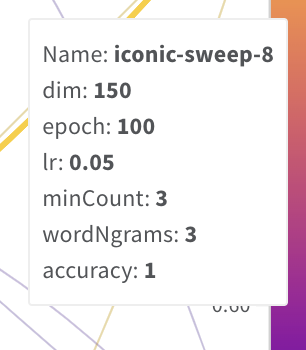

In [10]:
!pip install fasttext

In [11]:
import fasttext

# 이전 파라미터
#                                   epoch=100,
#                                   bucket = 20000,
#                                   lr = 1,
#                                   wordNgrams=2,
#                                   dim=100,

model = fasttext.train_supervised(input=file_path,
                                    # 찾은 하이퍼파라미터
                                    epoch = 100,
                                    dim = 150,
                                    lr = 0.05,
                                    minCount = 3,
                                    wordNgrams = 2,
                                  )

Read 0M words
Number of words:  13890
Number of labels: 5
Progress: 100.0% words/sec/thread:  840433 lr:  0.000000 avg.loss:  0.145659 ETA:   0h 0m 0s


In [19]:
# model.save_model("model_fasttext.h5")

In [20]:
# model_test = fasttext.load_model('model_fasttext.h5')

In [25]:
# model_test.predict('안녕')

# test data

In [26]:
# {
#     '협박 대화': 0,
#     '갈취 대화': 1,
#     '직장 내 괴롭힘 대화': 2,
#     '기타 괴롭힘 대화': 3,
#     '일반 대화': 4
# }

In [15]:
import re

def preprocess_sentence(sentence, stopwords=None):
    # 개행자 삭제
    sentence = re.sub(r'[\n\r]', ' ', sentence)
    
    # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
    # 예를 들어서 "I am a student." => "I am a student ."와 같이
    # student와 온점 사이에 거리를 만듭니다. 
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)

    # (a-z, A-Z,가-힣,0-9, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
    sentence = re.sub(r"[^a-zA-Z가-힣0-9\.\?\!,]", " ", sentence)
    sentence = sentence.strip()

    # '키키'와 같이 연속된 키를 제거합니다.
    sentence = re.sub(r'키{2,}', '', sentence)
    sentence = re.sub(r'\b키\b', '', sentence)

    if stopwords:
        words = sentence.split()
        filtered_words = [word for word in words if word not in stopwords]
        sentence = ' '.join(filtered_words)

    return sentence

In [16]:
test = pd.read_csv('./data/custom_test.csv')

test['conversation'] = test['conversation'].apply(preprocess_sentence)
test.head()

,conversation
0,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,우리팀에서 다른팀으로 갈 사람 없나 ? 그럼 영지씨가 가는건 어때 ? 네 ? 제가요...
2,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요 . ? 제대로 좀 하지 네 똑바로 좀 하...
3,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
4,아무튼 앞으로 니가 내 와이파이야 . . 응 와이파이 온 . 켰어 . 반말 ? 주인...


In [17]:
predictions = model.predict(list(test['conversation']))

# return
# (labels, probabilities)

len(predictions[0])


500

In [18]:
from collections import Counter

results = []
for pred in predictions[0]:
    pred = pred[0].replace('__label__','')
    results.append(pred)

# print(results)
Counter(results)

Counter({'1': 121, '2': 132, '4': 27, '3': 121, '0': 99})

In [19]:
# 'label' 값을 기준으로 'class' 컬럼 추가
class_dict = {
    0: '협박 대화',
    1: '갈취 대화',
    2: '직장 내 괴롭힘 대화',
    3: '기타 괴롭힘 대화',
    4: '일반 대화'
}

In [20]:
label_df = pd.DataFrame(columns=['label'])
test['label'] = results
test['label'] = test['label'].astype(int)
test['class'] = test['label'].map(class_dict)

test.head()


,conversation,label,class
0,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,1,갈취 대화
1,우리팀에서 다른팀으로 갈 사람 없나 ? 그럼 영지씨가 가는건 어때 ? 네 ? 제가요...,2,직장 내 괴롭힘 대화
2,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요 . ? 제대로 좀 하지 네 똑바로 좀 하...,2,직장 내 괴롭힘 대화
3,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...,4,일반 대화
4,아무튼 앞으로 니가 내 와이파이야 . . 응 와이파이 온 . 켰어 . 반말 ? 주인...,3,기타 괴롭힘 대화


In [21]:
samples= test.sample(100)

for text,class_name in zip(samples['conversation'],samples['class']):
    print('-'*30)
    print(text)
    print(class_name)

------------------------------
야 너 왜 그렇게 생겼어 ? 내가 뭘 너 정말 토나오게 생겼어 알아 ? 너도 잘생긴 거 아니거든 ? 너보단 백배 낫지 너처럼 생기면 어떤 기분이냐 ? 이 세상 살아갈 수는 있는거냐 ? 그만해 뭘 그만해 현실을 자각시켜야 너가 성형을 하든 뭘 하든 할 거아냐 내 얼굴이고 내가 알아서 할 거야 너 얼굴을 계속 대면해야하는 내가 괴로워서 그래 그만하라고 ! 얼굴도 못생긴데 성질도 드럽네
기타 괴롭힘 대화
------------------------------
너 지금 만나는 여자 내 여자친구 아니야 ? 미안 어쩌다 보니 그렇게 됐다 좋은 걸 어떡하냐 넌 말이 참 쉽네 우리가 몇 년 친군데 네가 어떻게 나한테 그럴 수 있어 ? 야 우리 수진이도 내가 좋다는데 이제 와서 뭘 어떡하려고 네가 그냥 넘어가주라 우리 수진이라니 걔가 왜 네 수진인데 여자가 세상에 걔 하나냐 친구 좋다는 게 다 뭐야 한 번만 봐주라 친구 ? 우리가 친구면 니가 이 따위로 나오면 안 됐지 아 미안하다니까 진짜 질리게 뭐라 그러네 뭐 ? 내가 학교에 다 소문 내고 너랑 정수진 죽여 버릴 거야 얘가 미쳤나 진정하고 얘기해
협박 대화
------------------------------
애 시어머니가 우습니 ? 아니요 . 그건아닌데 그게 아니면 미역국에 소고기 건더기가 없네 ? 아니 . 요새 건강생각하셔서 채식하신다하셔서요 그래도 그렇지 미역국에 고기가 없음 그게 미역국이니 ? 죄 . 죄송합니다 내가 말을 말지 이렇게 답답해서야 다시 끓일까요 ? 그럼 이거 먹으라고 ? 죄송합니다 .
직장 내 괴롭힘 대화
------------------------------
야 오늘 피시방가자 피시방 좋지 어 ? 피시방 ? 나도 갈래 ! 어 . 너도 가려고 ? 너랑 가기 싫은데 찐따야 왜 ? 아니 너 발컨이잖아 같이하면 지기만하는데 . 저리 꺼져 . 너랑 하기싫은데 너랑 하면 재미도 없고 부모욕만 겁나 먹는데 오늘은 잘할 자신 있어 ! ! 싫어 너 그 말만 몇

# submission

In [22]:
submission = pd.read_csv('./data/submission.csv')
submission['class'] = test['label']

In [23]:
submission.head()

,file_name,class
0,t_000,1
1,t_001,2
2,t_002,2
3,t_003,4
4,t_004,3


In [24]:
submission.to_csv('my_submission.csv', index=False)

# numpy 저장용

In [28]:
save_predictions = model.predict(list(test['conversation']), k=-1)

In [29]:
# predictions

In [36]:
# save_predictions

In [32]:
print(save_predictions[0][0])
print(save_predictions[1][0])

['__label__1', '__label__0', '__label__3', '__label__2', '__label__4']
[0.4013138  0.38320243 0.2091036  0.00602154 0.00040851]


In [33]:
import numpy as np

# 라벨 순서를 명시적으로 지정
labels = ["__label__0", "__label__1", "__label__2", "__label__3", "__label__4"]

# 예측 (k=-1로 설정하면 모든 라벨을 반환)
all_labels, all_probabilities = model.predict(list(test['conversation']), k=-1)


# np.argmax(save_predictions[1][1])


results_save = []

# 결과 출력 및 정렬
for i, text in enumerate(list(test['conversation'])):
    # 예측 결과의 라벨 인덱스 추출
    indices = all_labels[i]
    probabilities = all_probabilities[i]
    
    # 라벨 순서에 맞게 인덱스를 정렬
    sorted_indices = sorted(range(len(indices)), key=lambda x: labels.index(all_labels[i][x]))
    sorted_labels = [all_labels[i][j] for j in sorted_indices]
    sorted_probabilities = [probabilities[j] for j in sorted_indices]
    
#     print(f"Text: {text}")
#     print(f"Labels: {sorted_labels}")
#     print(f"Probabilities: {sorted_probabilities}")
    results_save.append(sorted_probabilities)

results_save = np.array(results_save)
print(results_save.shape)

(500, 5)


In [37]:
results_save[2]

array([4.0880265e-03, 3.7750453e-04, 9.9057156e-01, 5.0029019e-03,
       1.0026101e-05], dtype=float32)

In [38]:
np.save('fasttext_predictions', results_save)

In [39]:
import numpy as np
predictions = np.load('fasttext_predictions.npy')
print(predictions.shape)


for pred in predictions:
    print(np.argmax(pred))

(500, 5)
1
2
2
4
3
0
0
1
3
1
0
4
2
2
2
2
4
3
0
3
0
3
3
1
1
2
3
4
2
1
1
0
4
1
0
3
3
1
0
1
0
1
2
1
4
2
0
0
4
0
1
3
1
2
2
3
3
4
3
2
1
3
0
3
2
0
4
3
2
1
0
2
3
2
0
2
2
1
2
2
1
0
2
0
3
2
1
3
1
2
4
2
0
3
0
2
2
2
1
2
3
1
1
0
2
2
2
3
3
0
3
0
0
2
1
1
2
2
2
1
2
3
1
1
1
1
2
4
1
3
3
3
2
3
1
0
3
0
4
2
3
3
1
3
2
0
0
0
0
1
0
3
2
2
2
3
0
2
3
3
0
3
2
0
2
3
2
4
3
1
3
2
2
2
3
3
0
2
3
1
2
3
2
2
0
3
4
0
0
0
0
3
1
3
1
3
3
2
0
0
2
1
3
0
0
3
2
1
3
2
4
1
2
2
1
1
3
4
0
3
1
4
2
0
0
1
1
2
1
0
2
1
3
3
1
3
3
1
1
3
3
3
3
2
2
1
2
3
2
0
1
2
0
2
2
1
1
4
1
2
1
3
2
3
3
0
3
4
3
3
1
2
0
2
4
2
2
3
2
2
1
0
0
2
2
2
1
2
1
3
1
1
3
3
2
0
3
3
1
0
2
3
0
2
1
1
3
2
1
2
0
1
3
4
2
3
0
3
3
0
2
0
0
1
1
1
1
1
2
2
1
0
0
3
1
2
3
1
3
3
0
2
0
0
1
2
3
1
0
0
0
3
1
1
1
2
3
3
1
1
3
3
1
0
2
4
1
2
0
3
1
2
0
2
2
3
1
1
1
1
2
0
2
2
3
1
3
0
1
3
1
0
1
2
1
0
0
3
3
3
3
3
2
2
3
0
2
3
2
1
1
3
0
2
2
3
0
4
1
3
1
0
0
3
3
1
1
2
2
0
3
3
1
0
3
3
0
4
1
2
3
0
2
1
1
2
0
2
2
1
1
0
2
0
2
1
2
2
1
0
4
1
2
2
2
3
3
2
4
0
2
1
0
2
0
2
1
3
1
2
1
3
1
0
1
3
3
1
4
0
3
2
0
1
1
2